In [26]:
from collections import Counter, OrderedDict

from IPython.display import display, HTML


import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

In [2]:
idle1 = [0,3,3,4,119970,3,120012,3,4,3,3,3,4,3,119993,1,2,3,119910,3,4,3,4,119901,3,3,3,4,4,3,4,119892,2,4,4,3,3,4,119872,2,119917,1,1,1,1,1,1,3,119956,4,4,4,3,4,3,4]
idle2 = [994,119998,84,98,82,96,90,98,100,84,95,92,119983,89,98,92,96,93,96,93,96,93,97,119982,93,96,91,97,106,78,111,77,96,95,119975,93,98,100,84,99,84,98,92,95,94,119988,108,80,97,90,97,93,94,92,99,105,119978,103,83,98,91,94,91,95,91,94,105,119984,103,83,93,99,85,101,83,102,84,118,119989,86,98,103,84,86,92,94,111,73,103,119982,90,95,90,109,78,94,96,86,104]

In [3]:
def plot_count(arr, thr):
    counter = {}

    counter = Counter((v for v in arr if v < thr))
    counter = {str(k): counter[k] for k in sorted(counter.keys())}
    counter[f'>>'] = len([v for v in arr if v > thr])

    plt.bar(counter.keys(), counter.values())

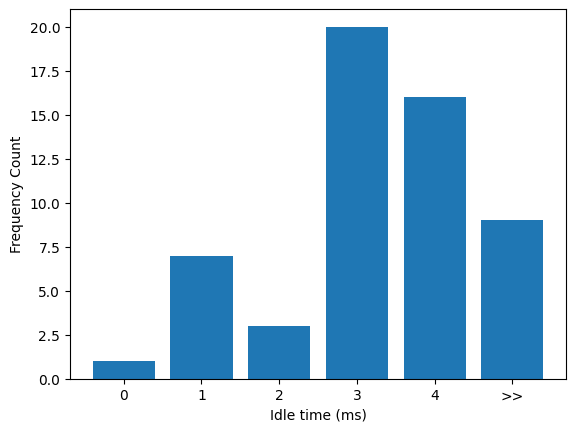

In [4]:
plt.xlabel('Idle time (ms)')
plt.ylabel('Frequency Count')
plot_count(idle1, 5)
plt.savefig(f'../build/w1_hist.png')

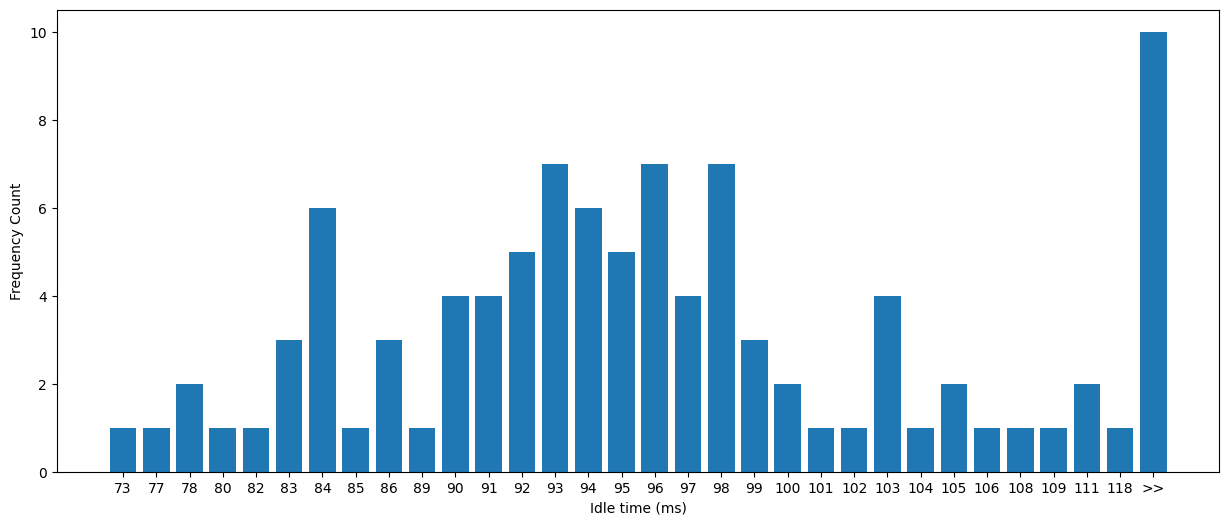

In [5]:
plt.figure(figsize=(15,6))
plt.xlabel('Idle time (ms)')
plt.ylabel('Frequency Count')
plot_count(idle2, 200)
plt.savefig(f'../build/w2_hist.png')

In [6]:
df = pd.DataFrame()
PREV_WINDOW = 7

df['workload'] = ['w1'] * len(idle1) + ['w2']*PREV_WINDOW + ['w2']*len(idle2)
df['curr'] = idle1 + [0]*PREV_WINDOW + idle2
df['delay_small'] = df['curr'] <= 4
df['delay_mid'] = (df['curr'] > 4) & (df['curr'] < 200)
df['delay_big'] = df['curr'] > 200
df['delay_sleep'] = df['curr'] > 4

shifted = df['curr']

for i in range(PREV_WINDOW):
    shifted = np.roll(shifted,1)
    shifted[0] = 0

    df[f'curr - {i+1}'] = shifted

df = df[df[f'curr - {PREV_WINDOW}'] != 0]
df

,workload,curr,delay_small,delay_mid,delay_big,delay_sleep,curr - 1,curr - 2,curr - 3,curr - 4,curr - 5,curr - 6,curr - 7
8,w1,4,True,False,False,False,3,120012,3,119970,4,3,3
9,w1,3,True,False,False,False,4,3,120012,3,119970,4,3
10,w1,3,True,False,False,False,3,4,3,120012,3,119970,4
11,w1,3,True,False,False,False,3,3,4,3,120012,3,119970
12,w1,4,True,False,False,False,3,3,3,4,3,120012,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,w2,78,False,True,False,True,109,90,95,90,119982,103,73
158,w2,94,False,True,False,True,78,109,90,95,90,119982,103
159,w2,96,False,True,False,True,94,78,109,90,95,90,119982
160,w2,86,False,True,False,True,96,94,78,109,90,95,90


In [28]:
features = [s for s in df.columns if 'curr - ' in s]
x = df[features]
y = df['delay_sleep']

model = DecisionTreeClassifier(max_depth=None)
model.fit(x, y)

y_pred = model.predict(x)
score = model.score(x, y)

#print("Predictions:", y_pred)
print("R^2 Score:", score)

R^2 Score: 1.0


In [35]:
#plot_tree(model)

from sklearn.tree import export_text
print(export_text(model, feature_names = [f'h[{i}]' for i in range(7)]))

|--- h[1] <= 38.50
|   |--- h[6] <= 3.50
|   |   |--- h[3] <= 119974.50
|   |   |   |--- h[5] <= 3.50
|   |   |   |   |--- h[1] <= 3.50
|   |   |   |   |   |--- h[0] <= 2.50
|   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- h[0] >  2.50
|   |   |   |   |   |   |--- h[0] <= 59980.00
|   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |--- h[0] >  59980.00
|   |   |   |   |   |   |   |--- class: False
|   |   |   |   |--- h[1] >  3.50
|   |   |   |   |   |--- class: False
|   |   |   |--- h[5] >  3.50
|   |   |   |   |--- h[1] <= 3.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- h[1] >  3.50
|   |   |   |   |   |--- h[4] <= 3.50
|   |   |   |   |   |   |--- h[0] <= 59952.00
|   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |--- h[0] >  59952.00
|   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- h[4] >  3.50
|   |   |   |   |   |   |--- class: False
|   |   |--- h[3] >  119974.50
|   |   |   |--- class: